In [3]:
import music21
import mido
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import essentia.standard as es
%matplotlib inline

In [4]:
fake_mat = np.random.random((128,100))
fake_mat[fake_mat>0.5]=1
fake_mat[fake_mat<=0.5]=0

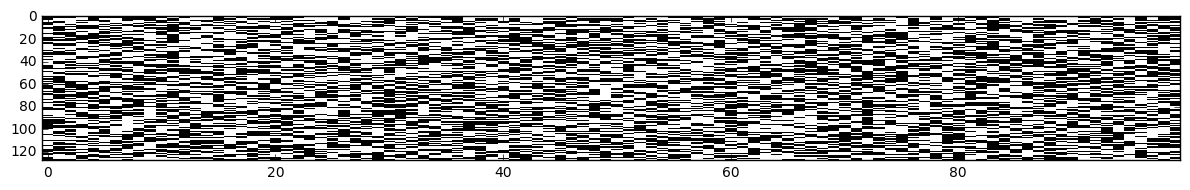

In [5]:
plt.figure(figsize=(12,2))
plt.imshow(fake_mat, interpolation='nearest', aspect='auto', cmap='Greys')
plt.tight_layout()

In [15]:
from mido import Message, MidiFile, MidiTrack, MetaMessage

for msg in MidiFile('/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/blues_for_alice.mid'):
    print(msg)
    
#msg = MidiFile('/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/blues_for_alice.mid').play()


#if msg.type == 'note_on':            
#            print(msg)


#for i, track in enumerate(msg.tracks):
    #print('Track {}: {}'.format(i, track.name))
#    for message in track:
#        if message.type == 'note_on':            
#            print(message)



<meta message sequencer_specific data=(0, 0, 0, 106, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 24, 0, 0, 0, 0, 0, 0, 32, 49, 0, 0, 64, 12, 0, 0, 46, 3, 0, 0, 64, 8, 0, 0, 46, 29, 0, 0, 64, 6, 0, 0, 64, 42, 0, 0, 0, 0, 0, 0, 46, 11, 0, 0, 64, 4, 0, 0, 46, 12, 0, 0, 0, 0, 0, 0, 16, 3, 0, 0, 64, 2, 0, 0, 46, 39, 0, 0, 0, 0, 0, 0, 64, 29, 0, 0, 0, 0, 0, 0, 64, 24, 0, 0, 0, 0, 0, 0, 46, 8, 0, 0, 64, 29, 0, 0, 29, 6, 0, 0, 0, 0, 0, 0) time=0>
<meta message sequencer_specific data=(0, 0, 0, 106, 0, 1, 32, 49, 0, 0, 64, 10, 0, 0, 16, 3, 0, 0, 64, 39, 0, 0, 46, 29, 0, 0, 64, 24, 0, 0, 64, 11, 0, 0, 0, 0, 0, 0, 46, 42, 0, 0, 64, 36, 0, 0, 16, 12, 0, 0, 0, 0, 0, 0, 46, 9, 0, 0, 64, 2, 0, 0, 46, 39, 0, 0, 0, 0, 0, 0, 64, 29, 0, 0, 0, 0, 0, 0, 64, 6, 0, 0, 0, 0, 0, 0, 46, 39, 0, 0, 64, 29, 0, 0, 1, 24, 0, 0, 0, 0, 0, 0, 13, 49, 0, 0, 64, 12, 0, 0, 46, 27, 0, 0, 64, 39, 0, 0, 46, 29, 0, 0, 64, 6, 0, 0) time=0>
<meta message sequencer_specific data=(0, 0, 0, 106, 0, 1, 64, 11, 0, 0, 0

In [21]:
import threading

import pygame
from pygame.locals import *

from mido import MidiFile,MetaMessage

music_file = "/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/blues_for_alice.mid"

#audio setup
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)
pygame.mixer.music.set_volume(0.8)


#MIDI parsing
mid = MidiFile(music_file)
t = mid.tracks

for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for message in track:
    # print message
        if isinstance(message, MetaMessage):
            if message.type == 'time_signature' or message.type == 'set_tempo' or message.type == 'key_signature' or message.type == 'ticks_per_beat':
                print message

t0 = t[0][3:len(t[0])-1]

print "t0", t0
#print "ticks_per_beat", mid.ticks_per_beat

t0l = len(t0)
toSeconds = 60.0 * t[0][2].clocks_per_click / (t[0][0].tempo * t[0][2].denominator) * 10
print "toSeconds",toSeconds

# append delta delays in milliseconds
delays = []

tempo = t[0][0].tempo
ticks_per_beat = mid.ticks_per_beat

last_event_ticks = 0
microseconds = 0

for event in self.t0:
    delta_ticks = event.time - last_event_ticks
    last_event_ticks = event.time
    delta_microseconds = tempo * delta_ticks / ticks_per_beat
    microseconds += delta_microseconds
    print event.text,microseconds/1000000.0
    delays.append(microseconds/1000)

    #timing setup
event_id = 0
now = pygame.time.get_ticks()
 



Track 0: Blues For Alice
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=413793 time=0>
<meta message key_signature key='C' time=0>
Track 1: Bass    (BB) 
Track 2: Drums   (BB) 
Track 3: Piano   (BB) 
Track 4: Guitar  (BB) (none) 
Track 5: Strings (BB) (none) 
Track 6: Melody  (BB) (none) 
Track 7: Soloist (BB) (none) 
t0 [<meta message sequencer_specific data=(0, 0, 0, 106, 0, 1, 64, 11, 0, 0, 0, 0, 0, 0, 46, 11, 0, 0, 64, 36, 0, 0, 16, 12, 0, 0, 0, 0, 0, 0, 16, 9, 0, 0, 64, 34, 0, 0, 46, 39, 0, 0, 0, 0, 0, 0, 64, 1, 0, 0, 0, 0, 0, 0, 29, 24, 0, 0, 0, 0, 0, 0, 16, 39, 0, 0, 64, 29, 0, 0, 29, 6, 0, 0, 0, 0, 0, 0, 13, 49, 0, 0, 64, 10, 0, 0, 16, 27, 0, 0, 64, 39, 0, 0, 46, 1, 0, 0, 64, 6, 0, 0, 64, 42, 0, 0, 0, 0, 0, 0, 16, 42, 0, 0, 64, 4, 0, 0, 46, 12, 0, 0, 0, 0, 0, 0) time=0>, <meta message sequencer_specific data=(0, 0, 0, 106, 0, 1, 46, 3, 0, 0, 64, 34, 0, 0, 46, 39, 0, 0, 0, 0, 0, 0, 64

TypeError: 'MetaMessage' object is not iterable

In [ ]:
def note_on(channel, note, velocity, time):
    data[1] = channel
    data[2] = note
    data[3] = velocity
    data[4] = time
    

In [4]:
def tonnetz_matrix():
    """Return the tonnetz projection matrix."""
    pi = np.pi
    chroma = np.arange(12)
    r_fifth = 1.
    r_minor_thirds = 1.
    r_major_thirds = 0.5

    # Define each row of the transform matrix
    fifth_x = r_fifth*(np.sin((7*pi/6) * chroma))
    fifth_y = r_fifth*(np.cos((7*pi/6) * chroma))
    minor_third_x = r_minor_thirds*(np.sin(3*pi/2 * chroma))
    minor_third_y = r_minor_thirds*(np.cos(3*pi/2 * chroma))
    major_third_x = r_major_thirds*(np.sin(2*pi/3 * chroma))
    major_third_y = r_major_thirds*(np.cos(2*pi/3 * chroma))

    # Return the tonnetz matrix
    return np.vstack((fifth_x, fifth_y,
                      minor_third_x, minor_third_y,
                      major_third_x, major_third_y))

In [25]:
def tonnetz(chroma):
    """Project a pitch class vector on the tonnetz.
    Chroma is a list of pitches (possibly with weights) regardless of octave

    Return value is normalized to prevent numerical instabilities  
    """
    
    TONNETZ_MATRIX = tonnetz_matrix()
    
    tonnetz = np.dot(TONNETZ_MATRIX, chroma)
    one_norm = np.sum(np.abs(chroma))
    if (one_norm != 0.):
        tonnetz = tonnetz / one_norm # Normalize tonnetz vector
    else:
        tonnetz = np.zeros(6) # Norm is zero, nullify vector
    return tonnetz


In [26]:
def tonnetz_distance(a, b):
    """Compute tonnetz-distance between two pitch class vectors.
    
    ----
    >>> C = np.zeros(12)
    >>> C[0] = 1
    >>> D = np.zeros(12)
    >>> D[2] = 1
    >>> G = np.zeros(12)
    >>> G[7] = 1

    The distance is zero on equivalent chords
    >>> distance(C, C) == 0
    True

    The distance is symetric
    >>> distance(C, D) == distance(D, C)
    True

    >>> distance(C, D) > 0
    True
    >>> distance(C, G) < distance(C, D)
    True
    """
    [a_tonnetz, b_tonnetz] = [tonnetz(x) for x in [a, b]]
    return np.linalg.norm(b_tonnetz - a_tonnetz)


In [27]:
def pitch_to_chroma(pitch_seq):
    
    chroma = np.zeros(12)
    for i in pitch_seq:
        chroma[i] +=1
        
    return chroma



In [28]:
notes_window = 10

b = pitch_to_chroma(pitch_seq[0:notes_window])
chord_change = np.zeros(len(pitch_seq)/notes_window+1)

for i in range(len(chord_change)):
    a = b
    b = pitch_to_chroma(pitch_seq[i*notes_window:(i+1)*notes_window])
    chord_change[i]= tonnetz_distance(a,b)

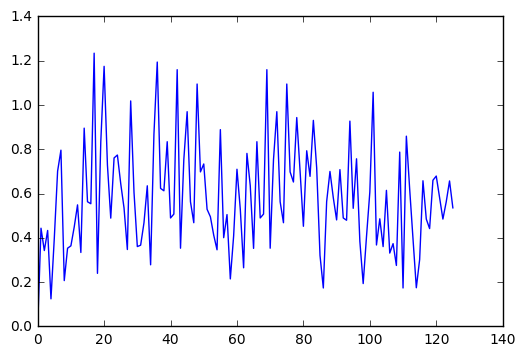

In [29]:
plt.plot(chord_change)